In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# Read csv file
Data = r'data/training.csv'
data = pd.read_csv(Data)

In [3]:
# Drop missing value
## data = data.dropna()

In [4]:
# Fill in missing value
data = data.fillna(0)

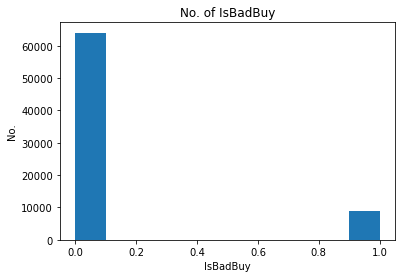

In [5]:
# Histogram of IsBadBuy column.
plt.hist(data['IsBadBuy'])

# title and label
plt.title('No. of IsBadBuy')
plt.xlabel('IsBadBuy')
plt.ylabel('No.')

# show
plt.show()

In [6]:
data.head(1)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,0,0,21973,33619,FL,7100.0,0,1113


In [7]:
# Cleanning to avoid multicollinearity
dummy_WheelTypeID = pd.get_dummies(data['WheelTypeID'], prefix=['WheelTypeID'], drop_first=True)

data.drop('WheelTypeID', axis=1, inplace=True)

data = data.join(dummy_WheelTypeID)

In [8]:
data.head(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,['WheelTypeID']_1.0,['WheelTypeID']_2.0,['WheelTypeID']_3.0
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,0,21973,33619,FL,7100.0,0,1113,1,0,0
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,0,19638,33619,FL,7600.0,0,1053,1,0,0
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,0,19638,33619,FL,4900.0,0,1389,0,1,0
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,0,19638,33619,FL,4100.0,0,630,1,0,0
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,0,19638,33619,FL,4000.0,0,1020,0,1,0


In [9]:
# Only includes the numerical features
## data = data._get_numeric_data()

# Encode dummies into features
data = pd.get_dummies(data, drop_first=True)

In [10]:
data.head(1)

,RefId,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,1,0,2006,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# shuffle data sequence in random
from sklearn.utils import shuffle
data_shf = shuffle(data)

# m: no. of samples
# n: no. of features
(m, n) = data_shf.shape

In [12]:
m, n

(72983, 2712)

In [13]:
# Identify feature columns
fea_cols = data_shf.columns[2:]

X = data_shf[fea_cols]
Y = data_shf['IsBadBuy']

In [14]:
print (X.shape, Y.shape)

(72983, 2710) (72983,)


In [15]:
# Normalizing feaures
from sklearn.preprocessing import StandardScaler
normalized_X = StandardScaler().fit_transform(X)

In [16]:
## Perfoming PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=1000)
proj_X = pca.fit_transform(normalized_X)

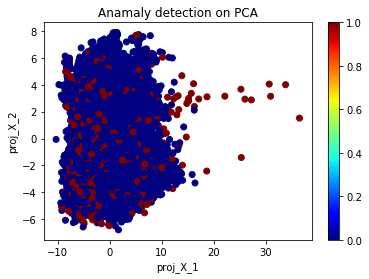

In [17]:
# Drawing anamoly dot on projected X 
plt.scatter(proj_X[:, 0], proj_X[:, 1], c=Y, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anamaly detection on PCA')
plt.xlabel('proj_X_1')
plt.ylabel('proj_X_2')

plt.show()

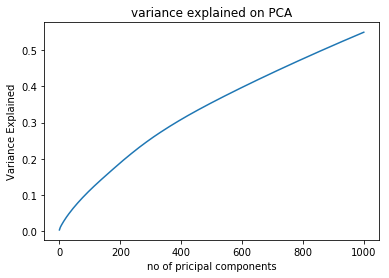

In [18]:
# Drawing Variance Explained on PCA 
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# title and label
plt.title('variance explained on PCA')
plt.xlabel('no of pricipal components')
plt.ylabel('Variance Explained')

plt.show()

In [19]:
pca.explained_variance_ratio_

array([ 0.00394422,  0.00268686,  0.00247846,  0.0021424 ,  0.00175738,
        0.00163923,  0.00152508,  0.00151279,  0.00149613,  0.00148237,
        0.00144039,  0.00140955,  0.00138941,  0.00136184,  0.00135545,
        0.00133691,  0.00132028,  0.00130182,  0.00128309,  0.00127508,
        0.00126384,  0.00124868,  0.00124066,  0.00123387,  0.00121692,
        0.00120056,  0.00119449,  0.0011533 ,  0.00114733,  0.00113629,
        0.00113122,  0.00111897,  0.00111321,  0.00111298,  0.00110941,
        0.00110905,  0.0010994 ,  0.00109744,  0.00109416,  0.00107724,
        0.00107016,  0.00106572,  0.00105811,  0.00104397,  0.0010395 ,
        0.00102846,  0.0010125 ,  0.0010079 ,  0.00100611,  0.00100122,
        0.00099614,  0.00099308,  0.00099167,  0.0009849 ,  0.00097723,
        0.00097615,  0.00097291,  0.00097183,  0.00096513,  0.00095782,
        0.00095139,  0.00094643,  0.00094595,  0.00093906,  0.0009372 ,
        0.0009333 ,  0.00093108,  0.00092745,  0.00092372,  0.00

In [20]:
proj_X.shape

(72983, 1000)

In [21]:
proj_X = proj_X[:, :20]

In [22]:
proj_X.shape

(72983, 20)

In [23]:
# folds for training and testing
folds = 5

In [24]:
# Slicing into training and testing set
ta_x = proj_X[round(m/folds) + 1:]
ta_y = Y[round(m/folds) + 1:]

tt_x = proj_X[:round(m/folds)]
tt_y = Y[:round(m/folds)]

In [25]:
# Logistic Regression and SVM
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support


In [26]:
## IsolationForest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=500)

# Training
ta_x_isofro = ta_x[ np.where(ta_y == 0)[0] ]

clf.fit(ta_x_isofro)

# Prediction
tt_pred_y = clf.predict(tt_x)
np.place(tt_pred_y, tt_pred_y==-1, 0)

# Performance measurement
print ('===== IsolationForest =====')
print ( '(Precision, Recall, fbeta_score, None) : ', precision_recall_fscore_support(tt_y, tt_pred_y, average='binary'))

===== IsolationForest =====
(Precision, Recall, fbeta_score, None) :  (0.1254877955467136, 0.88648648648648654, 0.21985387760573769, None)


In [27]:
## Unsupervised SVM
clf = svm.OneClassSVM(kernel="rbf")
ta_x_regular = ta_x[ np.where(ta_y == 0)[0] ]
clf.fit(ta_x_regular)

# SVM Prediction

tt_pred_y = clf.predict(tt_x)

# Performance measurement
print ('===== Unsupervised SVM =====')
print ( '(Precision, Recall, fbeta_score, None): ', precision_recall_fscore_support(tt_y, tt_pred_y, average='binary'))

===== Unsupervised SVM =====
(Precision, Recall, fbeta_score, None):  (0.11601981833195706, 0.45567567567567568, 0.18494953927161037, None)


In [29]:
## Logistic Regression
clf = svm.SVC()

# Linear Kernel
clf.set_params(kernel='linear').fit(ta_x, ta_y)

# Logistic Regression Prediction
tt_pred_y = clf.predict(tt_x)

# Performance measurement
print ('===== Logistic Regression =====')
print ( '(Precision, Recall, fbeta_score, None) : ', precision_recall_fscore_support(tt_y, tt_pred_y, average='binary'))

===== Logistic Regression =====
(Precision, Recall, fbeta_score, None) :  (0.0, 0.0, 0.0, None)


/Users/duke/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
## SVM
clf = svm.SVC()

# RBF Kernel
clf.set_params(kernel='rbf').fit(ta_x, ta_y)

# SVM Prediction
tt_pred_y = clf.predict(tt_x)

# Performance measurement
print ('===== SVM =====')
print ( '(Precision, Recall, fbeta_score, None) : ', precision_recall_fscore_support(tt_y, tt_pred_y, average='binary'))

===== SVM =====
(Precision, Recall, fbeta_score, None) :  (0.59999999999999998, 0.0016216216216216215, 0.003234501347708895, None)


# Summary

## Procedure:
* read from csv file
* dealing with missing values
* encoding every category features
* performing PCA to reduce dimension
* performing differenct models


## Conclusion 
As we can see from the anamoly projection after performing PCA (the blue dots represent the normal samples, while the red dots represent the anamoly), the distribution of BadBuy neither is a normal distribution nor has a clear boundry between the regular one and the anamoly. Thus, it makes detection harder for simple models.

Due to computing resources and time, only the first 20 eigen-vector are used to perform further model fitting. If time and resources are allowed, the way to improving the result may be the following:
* feature engineering, to find the suitable feautures for the detection, i.e. add complex feature such as x -> x^2 
* cross validation, to find the best parameter


Since the problem wants to detect the anaomoly (around 1/7 of data), we need to find the few outliers. Thus, we care more about recall than precision. Based on the four model above, IsolationForest performance the best on recall 0.89, while SVM perform the best on precision 0.59.

